# Automatic Ticket Classification Case Study

<hr style="border:1px solid blue">

A case study to create a model that can automatically classify customer complaints based on the products and services that the ticket mentions.

### Project Description

For a financial company, customer complaints carry a lot of importance, as they are often an indicator of the shortcomings in their products and services. If these complaints are resolved efficiently in time, they can bring down customer dissatisfaction to a minimum and retain them with stronger loyalty. This also gives them an idea of how to continuously improve their services to attract more customers. 

These customer complaints are unstructured text data; so, traditionally, companies need to allocate the task of evaluating and assigning each ticket to the relevant department to multiple support employees. This becomes tedious as the company grows and has a large customer base.

#### Data Set Brief Information
The data set given to you is in the .json format and contains 78,313 customer complaints with 22 features. You need to convert this to a dataframe in order to process the given complaints.

#### Business Objective
As an NLP engineer for a financial company that wants to automate its customer support tickets system. As a financial company, the firm has many products and services such as credit cards, banking and mortgages/loans. 

#### Business Solution
Build a model that is able to classify customer complaints based on the products/services. By doing so, segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

With the help of non-negative matrix factorization (NMF), an approach under topic modelling, you will detect patterns and recurring words present in each ticket. This can be then used to understand the important features for each cluster of categories. By segregating the clusters, you will be able to identify the topics of the customer complaints. 

Need to do topic modelling on the .json data provided by the company. Since this data is not labelled, need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card
* Bank account services
* Theft/Dispute reporting
* Mortgages/loans
* Others 

With the help of topic modelling, we can map each ticket onto its respective department/category. Use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, classify any new customer complaint support ticket into its relevant department.

### Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1. Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

### Importing the necessary libraries

In [1]:
# Import all required libraries
import json 
import numpy as np
import pandas as pd

# Import regex, nltk, spacy and string libraries
import re, nltk, spacy, string

# Load english web text small library
import en_core_web_sm
nlp = en_core_web_sm.load()

# Import libraries for plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt
# To enable the inline plotting
%matplotlib inline

# Import wordclouds and stopword
from wordcloud import WordCloud, STOPWORDS

# from collections import Counter
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from plotly.offline import plot
# import plotly.graph_objects as go
# import plotly.express as px
# from pprint import pprint

# Importing CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

# Importing metrics from sklearn
from sklearn import metrics

# Importing Train, Test Split
from sklearn.model_selection import train_test_split

# Importing Grid Search
from sklearn.model_selection import GridSearchCV

# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
# Importing DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier
# Importing Random Forest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier
# Import Naive Bayes from sklearn
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import drive from Google Colab
import os
from google.colab import drive
# Mount Google Drive
drive.mount('/content/gdrive')
# Change current directory to 'My Drive'
os.chdir('gdrive/My Drive/')

### Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [3]:
# Opening JSON file 
f = open('complaints-2021-05-14_08_16.json', 'r')

# Create dataframe
data = json.load(f)
df = pd.json_normalize(data)

#### Data preparation

In [4]:
# Inspect the dataframe to understand the given data.
# Let's see first 5 values of data set.
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [5]:
# Check the shape of the dataframe
print('The given data set have {0} rows and {1} columns.'.format(df.shape[0], df.shape[1]))

The given data set have 78313 rows and 22 columns.


In [6]:
# Check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

**Observations**

1) We don't have any columns without name.

2) There are lot of NULL values in data set and hence imputation might be required.

3) Some columns have unique value, which can be removed.

4) Column `_source.complaint_what_happened` gives the entire details of the complaint.

5) Column `_source.product` gives the brief category of registered complaints.

In [7]:
# Print the column names
print(df.columns)

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')


In [8]:
# Check if there is any duplicated entries in rows
df[df.duplicated()]

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided


**Observation** : There are no such rows that have duplicated entries.

In [9]:
# Check the number of columns having null values across entire index range
df.isnull().all().sum()

0

In [10]:
# Check the number of rows having null values across entire column range
df.isnull().all(axis = 1).sum()

0

**Conclusion**

* We have 0 columns where entire column values are NULL
* We have no rows which have entire row contents as NULL

In [11]:
# Check for columns with only one unique value
print('Columns with only one unique value are:')
for col in df.columns:
    if (len(pd.unique(df[col])) == 1):
        print(col)

Columns with only one unique value are:
_index
_type
_score
_source.company


In [12]:
# After analysis, we can remove columns that are not required since they have only one unique value
list_of_columns = ['_index', '_type', '_score', '_source.company']

# Remove columns
df.drop(labels = list_of_columns, axis = 1, inplace = True)

In [13]:
# Assign nan in place of blanks in the complaints column
df['_source.complaint_what_happened'].replace("", np.nan, inplace=True)

In [14]:
# Display all columns having at least one null value present in its rows
df.columns[df.isnull().any()]

Index(['_source.tags', '_source.zip_code', '_source.state',
       '_source.company_public_response', '_source.sub_product',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [15]:
# Find missing values percentage
round(((df.isna().sum() * 100) / df.shape[0]), 2)

_id                                   0.00
_source.tags                         86.08
_source.zip_code                      8.63
_source.complaint_id                  0.00
_source.issue                         0.00
_source.date_received                 0.00
_source.state                         2.54
_source.consumer_disputed             0.00
_source.product                       0.00
_source.company_response              0.00
_source.submitted_via                 0.00
_source.date_sent_to_company          0.00
_source.company_public_response      99.99
_source.sub_product                  13.50
_source.timely                        0.00
_source.complaint_what_happened      73.09
_source.sub_issue                    59.12
_source.consumer_consent_provided     1.29
dtype: float64

**Observation** : `_source.complaint_what_happened` has 73.09 % of null values. We will remove these rows!

In [16]:
# Remove all rows where complaints column is nan
df.dropna(subset=['_source.complaint_what_happened'], inplace=True)

In [17]:
# Check if blank values still exist
df[df.loc[:, '_source.complaint_what_happened'] == '']

,_id,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided


**Observation** : All nan rows were removed from column `_source.complaint_what_happened`

In [18]:
# Find missing values percentage
round(((df.isna().sum() * 100) / df.shape[0]), 2)

_id                                   0.00
_source.tags                         81.89
_source.zip_code                     22.04
_source.complaint_id                  0.00
_source.issue                         0.00
_source.date_received                 0.00
_source.state                         0.68
_source.consumer_disputed             0.00
_source.product                       0.00
_source.company_response              0.00
_source.submitted_via                 0.00
_source.date_sent_to_company          0.00
_source.company_public_response      99.99
_source.sub_product                  10.01
_source.timely                        0.00
_source.complaint_what_happened       0.00
_source.sub_issue                    38.80
_source.consumer_consent_provided     0.00
dtype: float64

In [19]:
# Assign new column names
# Removing "_" from column names
df.columns = [re.sub('^_', '', col) for col in df.columns]

# Removing "source." from column names
df.columns = [re.sub(r"^\bsource\b\.", "", col) for col in df.columns]

In [20]:
# Print the column names
print(df.columns)

Index(['id', 'tags', 'zip_code', 'complaint_id', 'issue', 'date_received',
       'state', 'consumer_disputed', 'product', 'company_response',
       'submitted_via', 'date_sent_to_company', 'company_public_response',
       'sub_product', 'timely', 'complaint_what_happened', 'sub_issue',
       'consumer_consent_provided'],
      dtype='object')


In [21]:
# Check the shape of the dataframe
print('The data set now have {0} rows and {1} columns.'.format(df.shape[0], df.shape[1]))

The data set now have 21072 rows and 18 columns.


In [22]:
# Let's see first 5 values of data set.
df.head()

,id,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
1,3229299,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,3199379,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
10,3233499,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,N/A,"Credit reporting, credit repair services, or o...",Closed with explanation,Web,2019-05-06T12:00:00-05:00,None,Other personal consumer report,Yes,Chase Card was reported on XX/XX/2019. However...,Information belongs to someone else,Consent provided
11,3180294,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,N/A,"Credit reporting, credit repair services, or o...",Closed with explanation,Web,2019-03-15T12:00:00-05:00,None,Credit reporting,Yes,"On XX/XX/2018, while trying to book a XXXX XX...",Information belongs to someone else,Consent provided
14,3224980,None,920XX,3224980,Managing an account,2019-04-27T12:00:00-05:00,CA,N/A,Checking or savings account,Closed with explanation,Web,2019-04-27T12:00:00-05:00,None,Checking account,Yes,my grand son give me check for {$1600.00} i de...,Funds not handled or disbursed as instructed,Consent provided


### Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [23]:
# Write your function here to clean the text and remove all the unnecessary elements.
def clean_complaints(text):
    # To lowercase
    text = text.lower()

    # Remove text in square brackets
    text = re.sub(r'\[.*?\]','',text)

    # Remove punctuation
    text = re.sub(r'[%s]%re.escape(string.punctuation)','',text)

    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)

    return text

In [24]:
# Cleaning column 'complaint_what_happened'
df['complaint_what_happened'] = df['complaint_what_happened'].apply(lambda x: clean_complaints(x))

In [25]:
# Write your function to Lemmatize the texts
def lemmmatize_text(text):
    # Create an empty list to store lemmas
    lemmas = []

    # Extract lemmas of given text and add to the list 'lemmas'
    doc = nlp(text)
    for token in doc:
        lemmas.append(token.lemma_)

    # Convert list of lemmas in to string
    return " ".join(lemmas)

In [26]:
# Create a column to store lemmatized complaints
df['lemmatized_complaint'] = df['complaint_what_happened'].apply(lemmmatize_text)

In [27]:
# Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = df[['complaint_what_happened', 'lemmatized_complaint']]

In [28]:
# Let's see the data set - df_clean
df_clean

,complaint_what_happened,lemmatized_complaint
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...
2,i upgraded my xxxx xxxx card in xx/xx/ and was...,I upgrade my xxxx xxxx card in xx / xx/ and be...
10,"chase card was reported on xx/xx/. however, fr...","chase card be report on xx / xx/. however , fr..."
11,"on xx/xx/, while trying to book a xxxx xxxx ...","on xx / xx/ , while try to book a xxxx xxxx ..."
14,my grand son give me check for {$.} i deposit ...,my grand son give I check for { $ . } I deposi...
...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...
78309,"on wednesday, xx/xx/xxxx i called chas, my xxx...","on wednesday , xx / xx / xxxx I call chas , my..."
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...
78311,i have had flawless credit for yrs. i've had ...,I have have flawless credit for yrs . I 've ...


In [29]:
# Write your function to extract the POS tags 
def pos_tag(text):
    # Create an empty list to store words
    words = []
    
    # Extract words of given text with POS tag as 'NN' and add to the list 'words'
    doc = nlp(text)
    for token in doc:
        if token.tag_ == 'NN':
            words.append(token.lemma_)

    # Convert list of words in to string
    return ' '.join(words)

In [30]:
# Create a column containing only singular nouns
df_clean['complaint_POS_removed'] = df_clean['lemmatized_complaint'].apply(pos_tag)

In [31]:
# The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
# Let's see the data set - df_clean
df_clean

,complaint_what_happened,lemmatized_complaint,complaint_POS_removed
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...
2,i upgraded my xxxx xxxx card in xx/xx/ and was...,I upgrade my xxxx xxxx card in xx / xx/ and be...,xxxx card agent anniversary date agent informa...
10,"chase card was reported on xx/xx/. however, fr...","chase card be report on xx / xx/. however , fr...",chase card report application identity consent...
11,"on xx/xx/, while trying to book a xxxx xxxx ...","on xx / xx/ , while try to book a xxxx xxxx ...",xxxx xxxx ticket offer ticket reward card info...
14,my grand son give me check for {$.} i deposit ...,my grand son give I check for { $ . } I deposi...,son chase account fund chase bank account mone...
...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,chase card customer decade solicitation credit...
78309,"on wednesday, xx/xx/xxxx i called chas, my xxx...","on wednesday , xx / xx / xxxx I call chas , my...",xxxx credit card provider claim purchase prote...
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,xxxx risk consumer chase bank app chase year b...
78311,i have had flawless credit for yrs. i've had ...,I have have flawless credit for yrs . I 've ...,credit yrs chase credit card chase freedom pro...


### Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




In [32]:
# Get the length of character in 'complaint_POS_removed' column
char_len = [len(x) for x in df_clean['complaint_POS_removed']]

In [33]:
# Print total complaints present in char_len list
print('Total complaints registered : ', len(char_len))

# Print max character length
print('Max characters in registered complaints : ', max(char_len))

Total complaints registered :  21072
Max characters in registered complaints :  12795


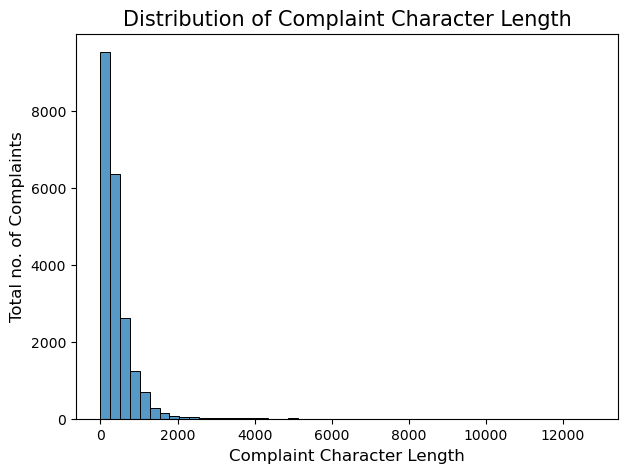

In [34]:
# Write your code here to visualise the data according to the 'Complaint' character length
plt.figure(figsize = [7, 5])
sns.histplot(data = char_len, bins = 50)
plt.title('Distribution of Complaint Character Length', fontsize = 15)
plt.xlabel('Complaint Character Length', size = 12)
plt.ylabel('Total no. of Complaints', size = 12)
plt.show()

**Observation** : Most of the registered complaints have less character length, which indicates the description of complaint have less words. Only few complaints are there with more than 4000 characters.


#### Find the top 40 words by frequency among all the articles after processing the text.

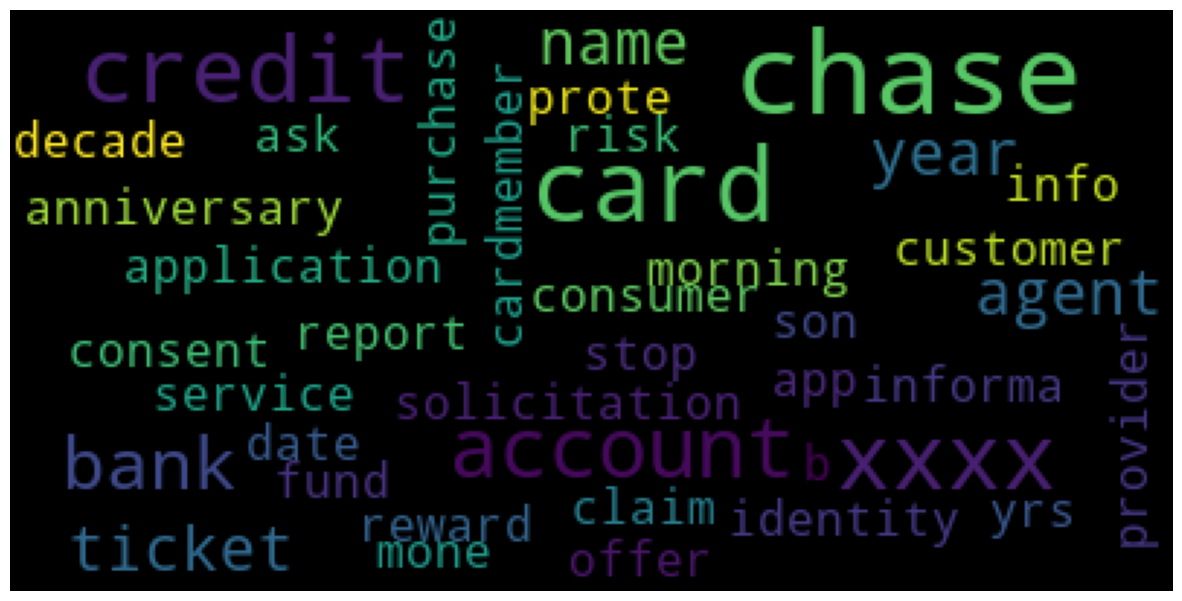

In [35]:
# Using a word cloud find the top 40 words by frequency among all the articles after processing the text
stop_words = set(STOPWORDS)
word_cloud = WordCloud(background_color = 'black', stopwords = stop_words, max_font_size = 40, 
                       max_words = 40, random_state = 42).generate(str(df_clean['complaint_POS_removed']))

fig = plt.figure(figsize=(15, 15))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

**Observation** - 'We can see 'chase', 'credit', 'card' and account as top words in word cloud. Also 'xxxx' is present in word cloud, which is actually hidden information in the complaint and it can be some personal info of customer.
One thing to note here is credit card is single word, yrs and years are same etc.

In [36]:
# Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [37]:
def find_top_ngrams(text, n=30, ngram=(1,1)):
    # Use CountVectorizer and find required ngram
    vector = CountVectorizer(stop_words='english', ngram_range=ngram).fit(text)
    
    # Transform and find sum
    bag_of_words = vector.transform(text)
    sum_of_words = bag_of_words.sum(axis=0)
    
    # Find frequency
    words_frequency = [(word, sum_of_words[0, index]) for word, index in vector.vocabulary_.items()]
    words_frequency = sorted(words_frequency, key = lambda x: x[1], reverse=True)
    
    # Return top 30
    return words_frequency[:n]

In [38]:
# Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
top_words = find_top_ngrams(df_clean['Complaint_clean'].values.astype('U'), n=30, ngram=(1,1))
df_unigram = pd.DataFrame(top_words, columns=['unigram', 'count'])

In [39]:
# Print the top 10 words in the unigram frequency
df_unigram.head(10)

,unigram,count
0,chase,51151
1,account,47037
2,xxxx,44952
3,credit,33612
4,card,30338
5,payment,21327
6,bank,19885
7,time,16270
8,charge,14073
9,day,13026


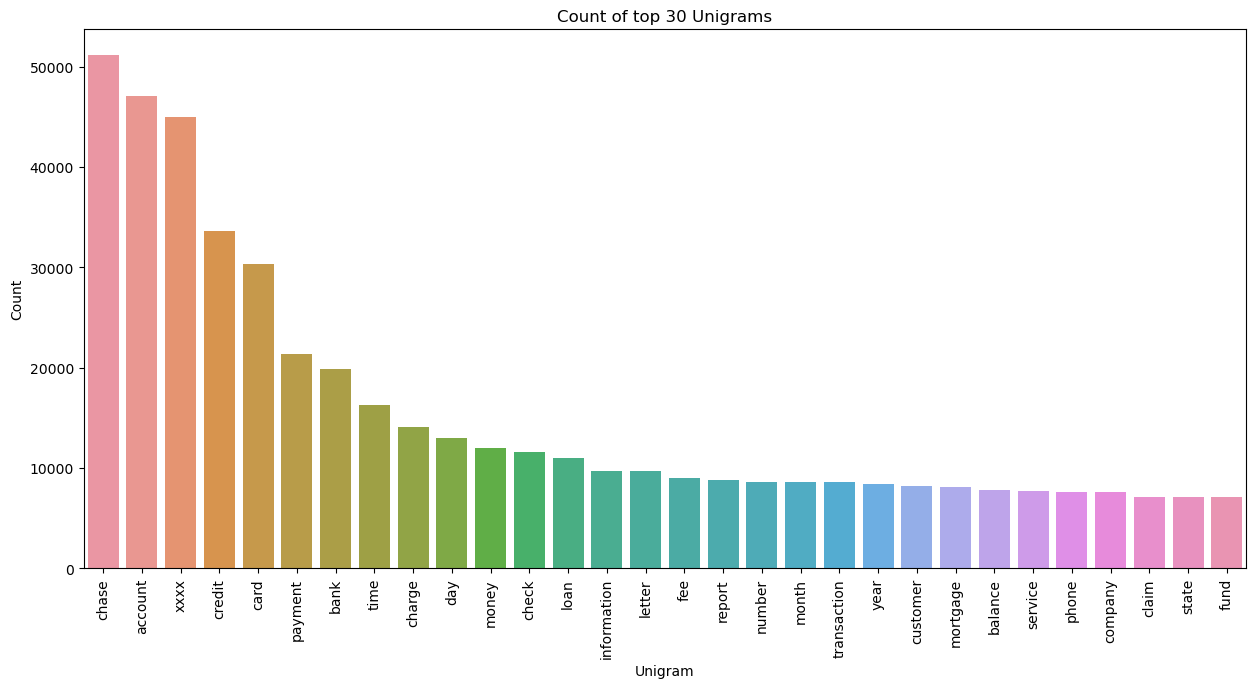

In [40]:
# Plotting top 30 Unigrams
plt.figure(figsize=[15,7])
sns.barplot(x=df_unigram['unigram'], y=df_unigram['count'])
plt.xticks(rotation=90)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 30 Unigrams")
plt.show()

**Observation** - Chase is the top most important unigram.

In [41]:
# Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
top_words = find_top_ngrams(df_clean['Complaint_clean'].values.astype('U'), n=30, ngram=(2,2))
df_bigram = pd.DataFrame(top_words, columns=['bigram', 'count'])

In [42]:
# Print the top 10 words in the bigram frequency
df_bigram.head(10)

,bigram,count
0,credit card,12896
1,xxxx xxxx,4882
2,credit report,3955
3,customer service,3062
4,account chase,2930
5,chase credit,2788
6,chase account,2606
7,bank account,2415
8,account account,2414
9,checking account,2108


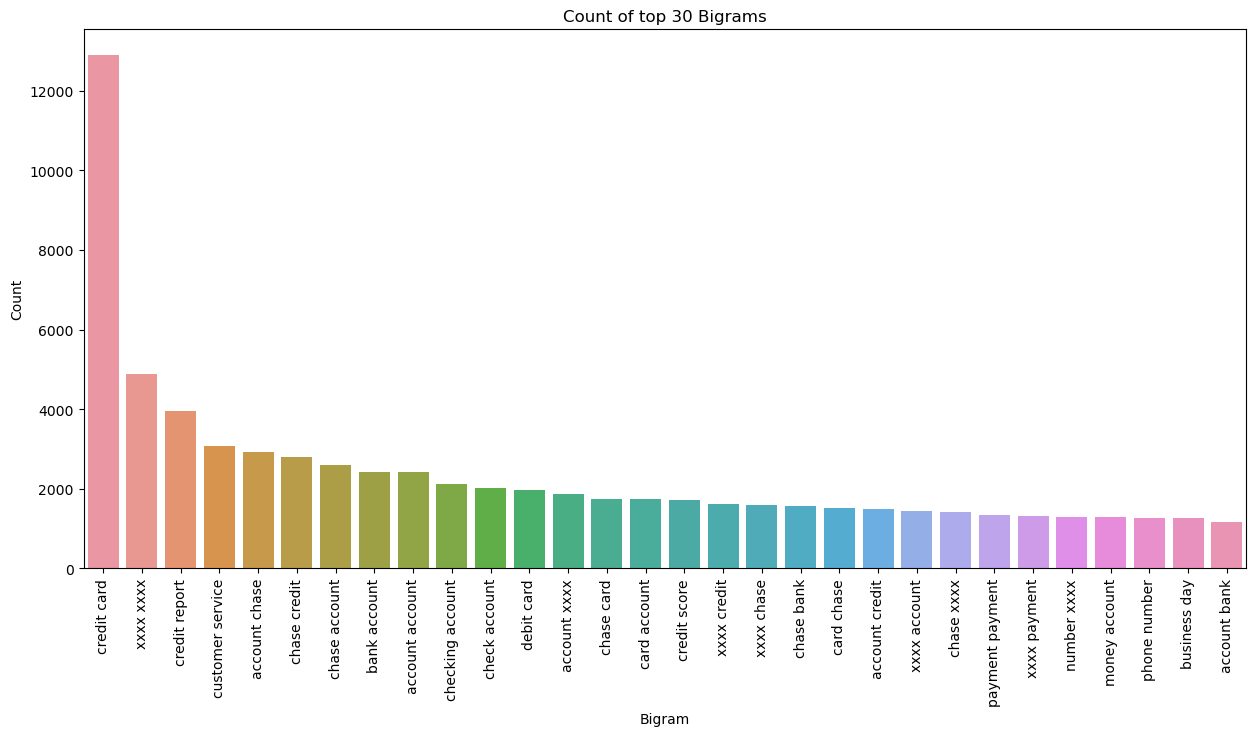

In [43]:
# Plotting top 30 Bigrams
plt.figure(figsize=[15,7])
sns.barplot(x=df_bigram['bigram'], y=df_bigram['count'])
plt.xticks(rotation=90)
plt.xlabel("Bigram")
plt.ylabel("Count")
plt.title("Count of top 30 Bigrams")
plt.show()

**Observation** - Credit Card is the top most important bigram.

In [44]:
# Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
top_words = find_top_ngrams(df_clean['Complaint_clean'].values.astype('U'), n=30, ngram=(3,3))
df_trigram = pd.DataFrame(top_words, columns=['trigram', 'count'])

In [45]:
# Print the top 10 words in the trigram frequency
df_trigram.head(10)

,trigram,count
0,chase credit card,1867
1,credit card account,1114
2,xxxx xxxx xxxx,1101
3,credit card company,995
4,xxxx credit card,794
5,credit card chase,709
6,credit card credit,526
7,inquiry credit report,487
8,account credit card,428
9,credit card xxxx,424


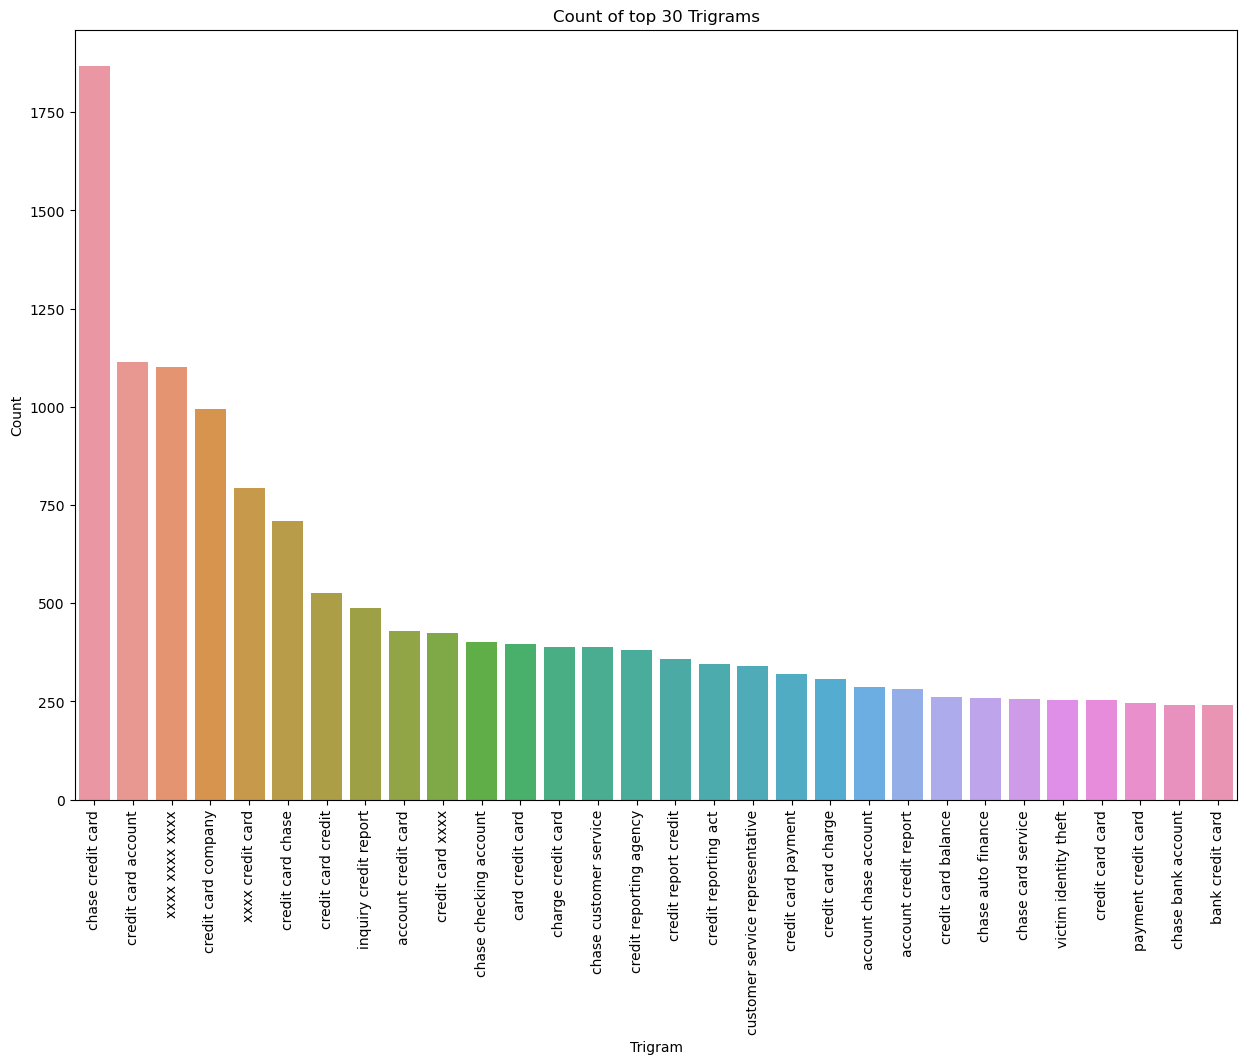

In [46]:
# Plotting top 30 Trigrams
plt.figure(figsize=[15,10])
sns.barplot(x=df_trigram['trigram'], y=df_trigram['count'])
plt.xticks(rotation=90)
plt.xlabel("Trigram")
plt.ylabel("Count")
plt.title("Count of top 30 Trigrams")
plt.show()

**Observation** - Chase credit card is the top most important trigram.


#### The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [47]:
# Remove the masked text - xxxx
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [48]:
# All masked texts has been removed
# Let's see the data set - df_clean
df_clean

,complaint_what_happened,lemmatized_complaint,complaint_POS_removed,Complaint_clean
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...
2,i upgraded my xxxx xxxx card in xx/xx/ and was...,I upgrade my xxxx xxxx card in xx / xx/ and be...,xxxx card agent anniversary date agent informa...,card agent anniversary date agent information...
10,"chase card was reported on xx/xx/. however, fr...","chase card be report on xx / xx/. however , fr...",chase card report application identity consent...,chase card report application identity consent...
11,"on xx/xx/, while trying to book a xxxx xxxx ...","on xx / xx/ , while try to book a xxxx xxxx ...",xxxx xxxx ticket offer ticket reward card info...,ticket offer ticket reward card information ...
14,my grand son give me check for {$.} i deposit ...,my grand son give I check for { $ . } I deposi...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...
...,...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,chase card customer decade solicitation credit...,chase card customer decade solicitation credit...
78309,"on wednesday, xx/xx/xxxx i called chas, my xxx...","on wednesday , xx / xx / xxxx I call chas , my...",xxxx credit card provider claim purchase prote...,credit card provider claim purchase protectio...
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,xxxx risk consumer chase bank app chase year b...,risk consumer chase bank app chase year banki...
78311,i have had flawless credit for yrs. i've had ...,I have have flawless credit for yrs . I 've ...,credit yrs chase credit card chase freedom pro...,credit yrs chase credit card chase freedom pro...


### Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [49]:
# Write your code here to initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [50]:
# Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean['Complaint_clean'])

# See Document Term Matrix
dtm

<21072x6338 sparse matrix of type '<class 'numpy.float64'>'
	with 607862 stored elements in Compressed Sparse Row format>

### Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [51]:
# Import NMF from sklearn kit
from sklearn.decomposition import NMF

### Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [52]:
# Load your nmf_model with the n_components i.e 5
num_topics = 5

# Keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

In [53]:
# Fit NFM on Document Term Matrix and get length of feature names
nmf_model.fit(dtm)
len(tfidf.get_feature_names_out())

6338

In [54]:
# Get components of NFM model
components = nmf_model.components_

In [55]:
# Print the Top15 words for each of the topics
words = np.array(tfidf.get_feature_names_out())
topic_words = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)
for i in range(num_topics):
    ix = components[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,check,bank,money,fund,chase,deposit,branch,day,checking,business,number,transfer,transaction,customer
Topic 2,card,credit,chase,balance,account,limit,score,year,point,month,offer,purchase,time,application,service
Topic 3,payment,loan,mortgage,chase,home,month,modification,time,year,rate,property,balance,statement,date,foreclosure
Topic 4,report,inquiry,credit,company,information,reporting,debt,identity,account,theft,score,letter,date,file,creditor
Topic 5,charge,dispute,transaction,chase,fee,merchant,claim,fraud,purchase,service,refund,email,time,day,company


In [56]:
# Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_results = nmf_model.transform(dtm)

In [57]:
# Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = topic_results.argmax(axis=1)

In [58]:
# Let's see the data set - df_clean
df_clean.head()

,complaint_what_happened,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,0
2,i upgraded my xxxx xxxx card in xx/xx/ and was...,I upgrade my xxxx xxxx card in xx / xx/ and be...,xxxx card agent anniversary date agent informa...,card agent anniversary date agent information...,1
10,"chase card was reported on xx/xx/. however, fr...","chase card be report on xx / xx/. however , fr...",chase card report application identity consent...,chase card report application identity consent...,3
11,"on xx/xx/, while trying to book a xxxx xxxx ...","on xx / xx/ , while try to book a xxxx xxxx ...",xxxx xxxx ticket offer ticket reward card info...,ticket offer ticket reward card information ...,3
14,my grand son give me check for {$.} i deposit ...,my grand son give I check for { $ . } I deposi...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,0


In [59]:
# Print the first 5 Complaint for each of the Topics
df_clean_temp = df_clean.groupby('Topic').head(5)
df_clean_temp.sort_values('Topic')

,complaint_what_happened,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,0
24,mishandling of this account by chase auto and ...,mishandle of this account by chase auto and xx...,mishandle account chase auto xxxx,mishandle account chase auto,0
17,with out notice j.p. morgan chase restricted m...,with out notice j.p . morgan chase restrict my...,account debit card branch customer service rep...,account debit card branch customer service rep...,0
14,my grand son give me check for {$.} i deposit ...,my grand son give I check for { $ . } I deposi...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,0
27,i opened an account with chase bank on xxxx an...,I open an account with chase bank on xxxx and ...,account bank code xxxx bonus xxxx term everyth...,account bank code bonus term everything acco...,0
32,my chase amazon card was declined for a cateri...,my chase amazon card be decline for a catering...,chase card decline catering order place brothe...,chase card decline catering order place brothe...,1
59,i currently have over xxxx chase ultimate rewa...,I currently have over xxxx chase ultimate rewa...,chase reward point month reward account % bonu...,chase reward point month reward account % bonu...,1
52,my roommate was stealing my chase debit card a...,my roommate be steal my chase debit card and d...,roommate chase debit card driver license money...,roommate chase debit card driver license money...,1
2,i upgraded my xxxx xxxx card in xx/xx/ and was...,I upgrade my xxxx xxxx card in xx / xx/ and be...,xxxx card agent anniversary date agent informa...,card agent anniversary date agent information...,1
50,i am a senior citizen that has been scammed by...,I be a senior citizen that have be scamme by s...,citizen company time share company nothing ref...,citizen company time share company nothing ref...,1


#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others


**Observation**
* Complaints mapped to Topic 0 indicates banking services.
* Complaints mapped to Topic 1 relates to card related issues.
* Complaints mapped to Topic 2 relates to general category.
* Complaints mapped to Topic 3 indicates some serious issues faced by customer.
* Complaints mapped to Topic 4 relates to loan took by customer.

Based on above observation, we can conclude that:
* Topic 0 - Bank Account services
* Topic 1 - Credit card or prepaid card
* Topic 2 - Theft/Dispute Reporting
* Topic 3 - Mortgage/Loan
* Topic 4 - Others

In [60]:
# Create the dictionary of Topic names and Topics after observation
Topic_names = { 0:"Bank account services", 1:"Credit card / Prepaid card", 2:"Others", 
               3:"Theft/Dispute reporting", 4:"Mortgages/loans" }
# Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [61]:
# Let's see the data set - df_clean
df_clean

,complaint_what_happened,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,Bank account services
2,i upgraded my xxxx xxxx card in xx/xx/ and was...,I upgrade my xxxx xxxx card in xx / xx/ and be...,xxxx card agent anniversary date agent informa...,card agent anniversary date agent information...,Credit card / Prepaid card
10,"chase card was reported on xx/xx/. however, fr...","chase card be report on xx / xx/. however , fr...",chase card report application identity consent...,chase card report application identity consent...,Theft/Dispute reporting
11,"on xx/xx/, while trying to book a xxxx xxxx ...","on xx / xx/ , while try to book a xxxx xxxx ...",xxxx xxxx ticket offer ticket reward card info...,ticket offer ticket reward card information ...,Theft/Dispute reporting
14,my grand son give me check for {$.} i deposit ...,my grand son give I check for { $ . } I deposi...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,Bank account services
...,...,...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,chase card customer decade solicitation credit...,chase card customer decade solicitation credit...,Credit card / Prepaid card
78309,"on wednesday, xx/xx/xxxx i called chas, my xxx...","on wednesday , xx / xx / xxxx I call chas , my...",xxxx credit card provider claim purchase prote...,credit card provider claim purchase protectio...,Mortgages/loans
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,xxxx risk consumer chase bank app chase year b...,risk consumer chase bank app chase year banki...,Mortgages/loans
78311,i have had flawless credit for yrs. i've had ...,I have have flawless credit for yrs . I 've ...,credit yrs chase credit card chase freedom pro...,credit yrs chase credit card chase freedom pro...,Credit card / Prepaid card


### Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [62]:
# Create the dictionary again of Topic names and Topics
Topic_names = { "Bank account services":0, "Credit card / Prepaid card":1, "Others":2,
               "Theft/Dispute reporting":3, "Mortgages/loans":4 }
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [63]:
# Let's see the data set - df_clean
df_clean

,complaint_what_happened,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,0
2,i upgraded my xxxx xxxx card in xx/xx/ and was...,I upgrade my xxxx xxxx card in xx / xx/ and be...,xxxx card agent anniversary date agent informa...,card agent anniversary date agent information...,1
10,"chase card was reported on xx/xx/. however, fr...","chase card be report on xx / xx/. however , fr...",chase card report application identity consent...,chase card report application identity consent...,3
11,"on xx/xx/, while trying to book a xxxx xxxx ...","on xx / xx/ , while try to book a xxxx xxxx ...",xxxx xxxx ticket offer ticket reward card info...,ticket offer ticket reward card information ...,3
14,my grand son give me check for {$.} i deposit ...,my grand son give I check for { $ . } I deposi...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,0
...,...,...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,chase card customer decade solicitation credit...,chase card customer decade solicitation credit...,1
78309,"on wednesday, xx/xx/xxxx i called chas, my xxx...","on wednesday , xx / xx / xxxx I call chas , my...",xxxx credit card provider claim purchase prote...,credit card provider claim purchase protectio...,4
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,xxxx risk consumer chase bank app chase year b...,risk consumer chase bank app chase year banki...,4
78311,i have had flawless credit for yrs. i've had ...,I have have flawless credit for yrs . I 've ...,credit yrs chase credit card chase freedom pro...,credit yrs chase credit card chase freedom pro...,1


In [64]:
# Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data = df_clean[['complaint_what_happened', 'Topic']]

In [65]:
# Let's see the data set - training_data
training_data

,complaint_what_happened,Topic
1,good morning my name is xxxx xxxx and i apprec...,0
2,i upgraded my xxxx xxxx card in xx/xx/ and was...,1
10,"chase card was reported on xx/xx/. however, fr...",3
11,"on xx/xx/, while trying to book a xxxx xxxx ...",3
14,my grand son give me check for {$.} i deposit ...,0
...,...,...
78303,after being a chase card customer for well ove...,1
78309,"on wednesday, xx/xx/xxxx i called chas, my xxx...",4
78310,i am not familiar with xxxx pay and did not un...,4
78311,i have had flawless credit for yrs. i've had ...,1


In [66]:
# View value counts of the five topics
training_data['Topic'].value_counts()

2    5146
0    5120
4    4525
1    4048
3    2233
Name: Topic, dtype: int64

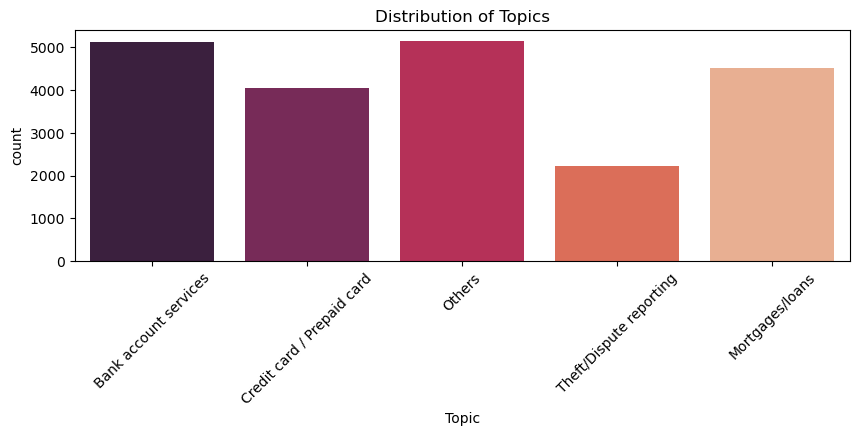

In [178]:
# Plotting a histogram of topics
plt.figure(figsize=[10,3])
ax = sns.countplot(data=training_data, x='Topic', palette='rocket')
ax.set_xticklabels(labels = ["Bank account services", "Credit card / Prepaid card", "Others", 
                             "Theft/Dispute reporting", "Mortgages/loans"], 
                   rotation=45)
plt.title("Distribution of Topics", fontsize=12)
plt.show()

**Observation** : Mostly all complaints belong to general category and only few complaints belongs to some serious issues faced by customer.


#### Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [67]:
# Write your code to get the Vector count
vect = CountVectorizer()
X_train_cnt = vect.fit_transform(training_data['complaint_what_happened'])

# Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_cnt)

In [157]:
# Split to Train (80 %) and Test data (20 %)
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['Topic'], test_size=0.2, random_state=42)

In [158]:
# Check the size of y_train
print("X_train dataframe have {0} Rows and {1} Columns".format(X_train.shape[0], X_train.shape[1]))
# Check the size of X_train
print("y_train dataframe have {0} Rows".format(y_train.shape[0]))

X_train dataframe have 16857 Rows and 27984 Columns
y_train dataframe have 16857 Rows


In [159]:
# Check the size of X_test
print("X_test dataframe have {0} Rows and {1} Columns".format(X_test.shape[0], X_test.shape[1]))
# Check the size of y_test
print("y_test dataframe have {0} Rows".format(y_test.shape[0]))

X_test dataframe have 4215 Rows and 27984 Columns
y_test dataframe have 4215 Rows


You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [160]:
# Function to plot confusion matrix and print classification report
def gen_conf_matrix(actual, predicted, model_name):
    class_names = ["Bank Account services", "Credit card or prepaid card", "Others",
                   "Theft/Dispute Reporting", "Mortgage/Loan"]
    confusion_matrix = metrics.confusion_matrix(actual, predicted)

    # Display confusion matrix
    print("Confusion Matrix for {}\n".format(model_name))
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_names)
    cm_display.plot()
    plt.xticks(rotation = 90)
    plt.show()
    
    # Print classification report
    print("\n\n\nClassification Report for {}\n".format(model_name))
    print(metrics.classification_report(actual, predicted, target_names=class_names))

### Logistic Regression

In [161]:
# Train basic Logistic Regression function
lr = LogisticRegression(random_state=42).fit(X_train, y_train)

In [162]:
# Getting the score of the base model
y_pred_lr = lr.predict(X_test)
f1_lr = metrics.f1_score(y_test, y_pred_lr, average='weighted')
acc_lr = metrics.accuracy_score(y_test, y_pred_lr)
print('Logistic Regression => Accuracy : {0} F1 score {1}'.format(acc_lr, f1_lr))

Logistic Regression => Accuracy : 0.9134045077105575 F1 score 0.9133433943851984


In [163]:
# Hyperparameters for Logistic Regression
param_lr = {"C": [0.001, 0.01, 0.1, 1, 10, 100],
            "penalty": ['l1', 'l2'],
            "solver": ["liblinear", "saga"]}

In [164]:
# Setup grid hyperparameter search for Logistic Regression
lr_cv = GridSearchCV(LogisticRegression(random_state=42),
                                param_grid=param_lr,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparameter search model
lr_cv.fit(X_train, y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [165]:
# Check best parameters
lr_cv.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [166]:
# Getting the score of the best parameters model
y_pred_lr_cv = lr_cv.predict(X_test)
f1_lr_cv = metrics.f1_score(y_test, y_pred_lr_cv, average='weighted')
acc_lr_cv = metrics.accuracy_score(y_test, y_pred_lr_cv)
print('Logistic Regression with best parameter => Accuracy : {0} F1 score {1}'.format(acc_lr_cv, f1_lr_cv))

Logistic Regression with best parameter => Accuracy : 0.933570581257414 F1 score 0.9335255912129872


Confusion Matrix for Logistic Regression



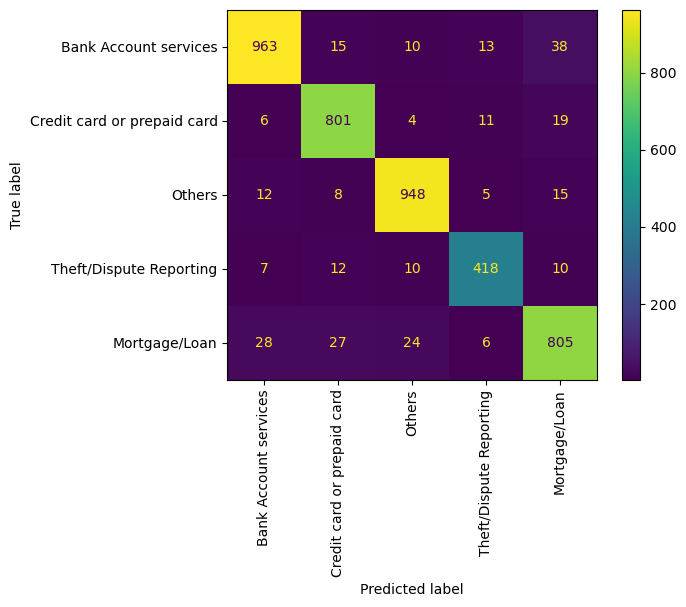




Classification Report for Logistic Regression

                             precision    recall  f1-score   support

      Bank Account services       0.95      0.93      0.94      1039
Credit card or prepaid card       0.93      0.95      0.94       841
                     Others       0.95      0.96      0.96       988
    Theft/Dispute Reporting       0.92      0.91      0.92       457
              Mortgage/Loan       0.91      0.90      0.91       890

                   accuracy                           0.93      4215
                  macro avg       0.93      0.93      0.93      4215
               weighted avg       0.93      0.93      0.93      4215



In [167]:
# Generate report
gen_conf_matrix(y_test, y_pred_lr_cv, "Logistic Regression")

### Decision Tree

In [78]:
# Train basic Decision Tree function
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [79]:
# Getting the score of the base model
y_pred_dt = dt.predict(X_test)
f1_dt = metrics.f1_score(y_test, y_pred_dt, average='weighted')
acc_dt = metrics.accuracy_score(y_test, y_pred_dt)
print('Decision Tree => Accuracy : {0} F1 score {1}'.format(acc_dt, f1_dt))

Decision Tree => Accuracy : 0.7524677296886864 F1 score 0.7529452665324005


In [80]:
# Hyperparameters for Decision Tree
param_dt = {"max_depth": [10, 15, 20],
            "min_samples_split": [15, 20, 25],
            "min_samples_leaf": [5, 10, 15]}

In [81]:
# Setup grid hyperparameter search for Decision Tree
dt_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                param_grid=param_dt,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparameter search model
dt_cv.fit(X_train, y_train);

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [82]:
# Check best parameters
dt_cv.best_params_

{'max_depth': 20, 'min_samples_leaf': 15, 'min_samples_split': 15}

In [83]:
# Getting the score of the best parameters model
y_pred_dt_cv = dt_cv.predict(X_test)
f1_dt_cv = metrics.f1_score(y_test, y_pred_dt_cv, average='weighted')
acc_dt_cv = metrics.accuracy_score(y_test, y_pred_dt_cv)
print('Decision Tree with best parameter => Accuracy : {0} F1 score {1}'.format(acc_dt_cv, f1_dt_cv))

Decision Tree with best parameter => Accuracy : 0.7676537585421412 F1 score 0.768251586150391


Confusion Matrix for Decision Tree



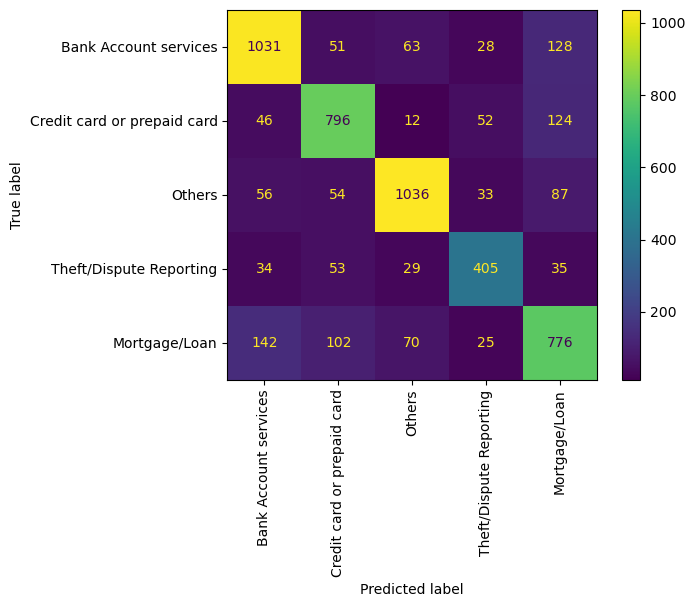




Classification Report for Decision Tree

                             precision    recall  f1-score   support

      Bank Account services       0.79      0.79      0.79      1301
Credit card or prepaid card       0.75      0.77      0.76      1030
                     Others       0.86      0.82      0.84      1266
    Theft/Dispute Reporting       0.75      0.73      0.74       556
              Mortgage/Loan       0.67      0.70      0.69      1115

                   accuracy                           0.77      5268
                  macro avg       0.76      0.76      0.76      5268
               weighted avg       0.77      0.77      0.77      5268



In [84]:
# Generate report
gen_conf_matrix(y_test, y_pred_dt_cv, "Decision Tree")

### Random Forest

In [85]:
# Train basic Random Forest function
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [86]:
# Getting the score of the base model
y_pred_rf = rf.predict(X_test)
f1_rf = metrics.f1_score(y_test, y_pred_rf, average='weighted')
acc_rf = metrics.accuracy_score(y_test, y_pred_rf)
print('Random Forest => Accuracy : {0} F1 score {1}'.format(acc_rf, f1_rf))

Random Forest => Accuracy : 0.8156795747911921 F1 score 0.813293425310021


In [87]:
# Hyperparameters for Random Forest
param_rf = {"n_estimators": [200, 250, 300],
            "max_depth": [10, 15, 20, 25, 30],
            "min_samples_split": [10, 15, 20],
            "min_samples_leaf": [5, 10, 15]}

In [88]:
# Setup grid hyperparameter search for 
rf_cv = GridSearchCV(RandomForestClassifier(random_state=42),
                                param_grid=param_rf,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparameter search model
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 20, 25],
                         'n_estimators': [200, 250, 300]},
             verbose=True)

In [89]:
# Check best parameters
rf_cv.best_params_

{'max_depth': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 250}

In [90]:
# Getting the score of the best parameters model
y_pred_rf_cv = rf_cv.predict(X_test)
f1_rf_cv = metrics.f1_score(y_test, y_pred_rf_cv, average='weighted')
acc_rf_cv = metrics.accuracy_score(y_test, y_pred_rf_cv)
print('Random Forest with best parameter => Accuracy : {0} F1 score {1}'.format(acc_rf_cv, f1_rf_cv))

Random Forest with best parameter => Accuracy : 0.7957479119210327 F1 score 0.7908610375154258


Confusion Matrix for Random Forest



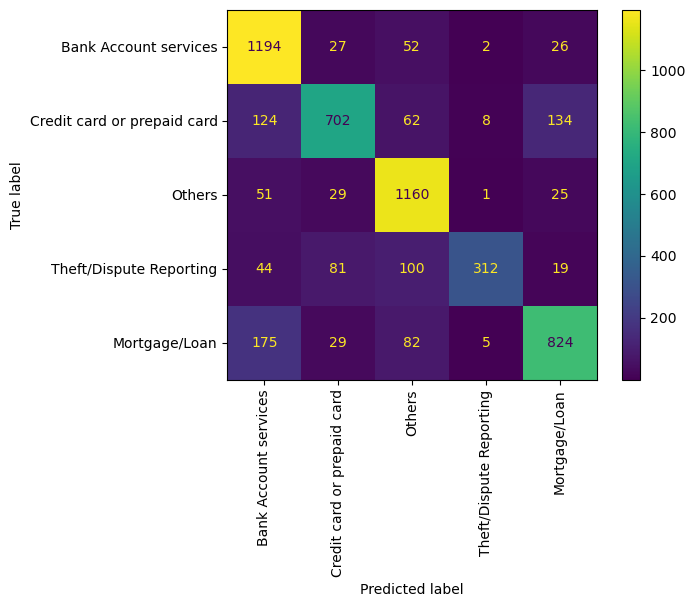




Classification Report for Random Forest

                             precision    recall  f1-score   support

      Bank Account services       0.75      0.92      0.83      1301
Credit card or prepaid card       0.81      0.68      0.74      1030
                     Others       0.80      0.92      0.85      1266
    Theft/Dispute Reporting       0.95      0.56      0.71       556
              Mortgage/Loan       0.80      0.74      0.77      1115

                   accuracy                           0.80      5268
                  macro avg       0.82      0.76      0.78      5268
               weighted avg       0.81      0.80      0.79      5268



In [91]:
# Generate report
gen_conf_matrix(y_test, y_pred_rf_cv, "Random Forest")

### Naive Bayes

In [92]:
# Train basic Naive Bayes function
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [93]:
# Getting the score of the base model
y_pred_nb = nb.predict(X_test)
f1_nb = metrics.f1_score(y_test, y_pred_nb, average='weighted')
acc_nb = metrics.accuracy_score(y_test, y_pred_nb)
print('Naive Bayes => Accuracy : {0} F1 score {1}'.format(acc_nb, f1_nb))

Naive Bayes => Accuracy : 0.7019741837509491 F1 score 0.6777860554586266


In [94]:
# Hyperparameters for Naive Bayes
param_nb = {
    'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001),
    'fit_prior':[True, False]
}

In [95]:
# Setup grid hyperparameter search for Naive Bayes
nb_cv = GridSearchCV(estimator=nb, 
                       param_grid=param_nb,
                       verbose=1,
                       scoring='f1_weighted',
                       n_jobs=-1,
                       cv=5)

# Fit random hyperparameter search model
nb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05),
                         'fit_prior': [True, False]},
             scoring='f1_weighted', verbose=1)

In [96]:
# Check best parameters
nb_cv.best_params_

{'alpha': 0.1, 'fit_prior': False}

In [97]:
# Getting the score of the best parameters model
y_pred_nb_cv = nb_cv.predict(X_test)
f1_nb_cv = metrics.f1_score(y_test, y_pred_nb_cv, average='weighted')
acc_nb_cv = metrics.accuracy_score(y_test, y_pred_nb_cv)
print('Naive Bayes with best parameter => Accuracy : {0} F1 score {1}'.format(acc_nb_cv, f1_nb_cv))

Naive Bayes with best parameter => Accuracy : 0.7619589977220956 F1 score 0.7609941331809367


Confusion Matrix for Naive Bayes



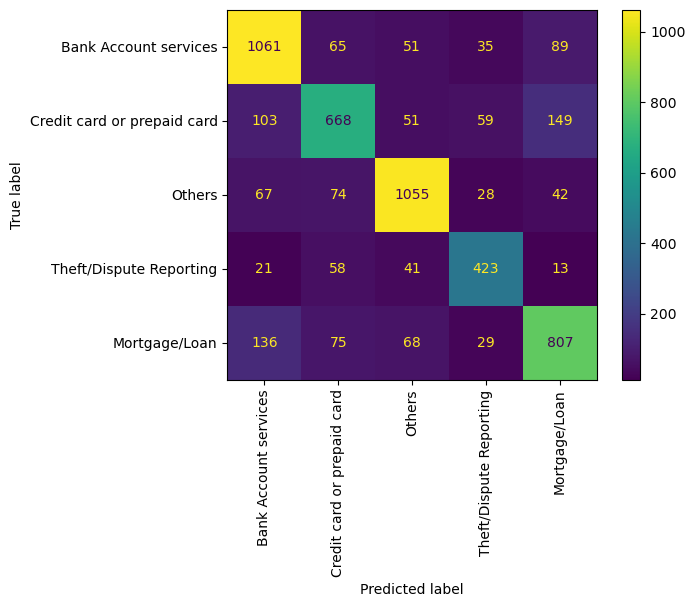




Classification Report for Naive Bayes

                             precision    recall  f1-score   support

      Bank Account services       0.76      0.82      0.79      1301
Credit card or prepaid card       0.71      0.65      0.68      1030
                     Others       0.83      0.83      0.83      1266
    Theft/Dispute Reporting       0.74      0.76      0.75       556
              Mortgage/Loan       0.73      0.72      0.73      1115

                   accuracy                           0.76      5268
                  macro avg       0.76      0.76      0.76      5268
               weighted avg       0.76      0.76      0.76      5268



In [98]:
# Generate report
gen_conf_matrix(y_test, y_pred_nb_cv, "Naive Bayes")

### Conclusion

In [173]:
# Creating a table which contains all the metrics
metric_dict = {'Logistic Regression' : [acc_lr, f1_lr], 
               'Decision Tree' : [acc_dt, f1_dt],
               'Random Forest' : [acc_rf, f1_rf], 
               'Naive Bayes' : [acc_nb, f1_nb],
               'Logistic Regression with Hyperparameter' : [acc_lr_cv, f1_lr_cv], 
               'Decision Tree with Hyperparameter' : [acc_dt_cv, f1_dt_cv],
               'Random Forest with Hyperparameter' : [acc_rf_cv, f1_rf_cv], 
               'Naive Bayes with Hyperparameter' : [acc_nb_cv, f1_nb_cv]}

metric_df = pd.DataFrame(metric_dict, index=['Accuracy', 'F1 score'])
metric_df

,Logistic Regression,Decision Tree,Random Forest,Naive Bayes,Logistic Regression with Hyperparameter,Decision Tree with Hyperparameter,Random Forest with Hyperparameter,Naive Bayes with Hyperparameter
Accuracy,0.913405,0.752468,0.815680,0.701974,0.933571,0.767654,0.795748,0.761959
F1 score,0.913343,0.752945,0.813293,0.677786,0.933526,0.768252,0.790861,0.760994


**Observation** : We can see that `Logistic Regression with Hyperparameter` outperforms all other models! We will choose this model as the **Best Model** for inference and categorize complaints in to 5 topics.


### Infering the best model

Using `Logistic Regression with Hyperparameter` model, let's predict topic of following complaints.

In [168]:
# Function to predict the Topic from complaint context
def topic_predicter(text):
    Topic_names = ["Bank account services", "Credit card / Prepaid card", "Others", 
                   "Theft/Dispute reporting", "Mortgages/loans"]
    X_new_counts = vect.transform(text)
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)
    predicted = lr_cv.predict(X_new_tfidf)
    return Topic_names[predicted[0]]

In [171]:
# Create a dataframe with complaints
df_complaints = pd.DataFrame({'Complaints': ['I am unable to open a checking or savings account could you please provide me with the discrepancies so i can resolve this matter.',
                                             'I did not realize this card had a yearly fee. The card I have not used is charging me for an annual fee and late payments to tallying over for a card i haven not used. They closed the account but wont refund the fees',
                                             'JPMorgan chase bank, foreclosed on me with out bringing me in the foreclosure case, even after i asked them to bring me in. I am the owner of record of the property & the person on the note.',
                                             'I have a chase credit card which is incorrectly reporting data on my credit report. The company is not helping in resolving the issue.',
                                             'A sofa, love seat, table and chairs and was never delivered but debit card charged. Bank says visa denied claim, we have no furniture and no money.',
                                             'I can not get from chase who services my mortgage, who owns it and who has original loan docs and signatures.']})

# View dataframe
df_complaints

,Complaints
0,I am unable to open a checking or savings acco...
1,I did not realize this card had a yearly fee. ...
2,"JPMorgan chase bank, foreclosed on me with out..."
3,I have a chase credit card which is incorrectl...
4,"A sofa, love seat, table and chairs and was ne..."
5,I can not get from chase who services my mortg...


In [172]:
# Predict the topic and display the dataframe
df_complaints['Topic'] = df_complaints['Complaints'].apply(lambda x: topic_predicter([x]))
df_complaints

,Complaints,Topic
0,I am unable to open a checking or savings acco...,Bank account services
1,I did not realize this card had a yearly fee. ...,Credit card / Prepaid card
2,"JPMorgan chase bank, foreclosed on me with out...",Others
3,I have a chase credit card which is incorrectl...,Theft/Dispute reporting
4,"A sofa, love seat, table and chairs and was ne...",Mortgages/loans
5,I can not get from chase who services my mortg...,Others


### Recommendation

`Logistic Regression with Hyperparameter` model is choosen as the **Best Model** for inference and categorize complaints in to 5 topics.
Model have Accuracy of 93.36 % and F1 score of 93.36 %

<hr style="border:1px solid red">